In [72]:
import itertools
import warnings
from datetime import datetime

import geopandas
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
from plotting import plot_correlation, plot_parameter
import intervals

parameters = [
    "turbidity",
    "conductivity",
    "ecoli"
]

watershed_parameters = intervals.joined_parameters_query(parameters, intervals.locations_query(), intervals.Interval.QUADRIMESTER)
watershed_parameters = watershed_parameters.dropna()
watershed_parameters = watershed_parameters[(watershed_parameters.avg_value_ecoli <= 50000)]

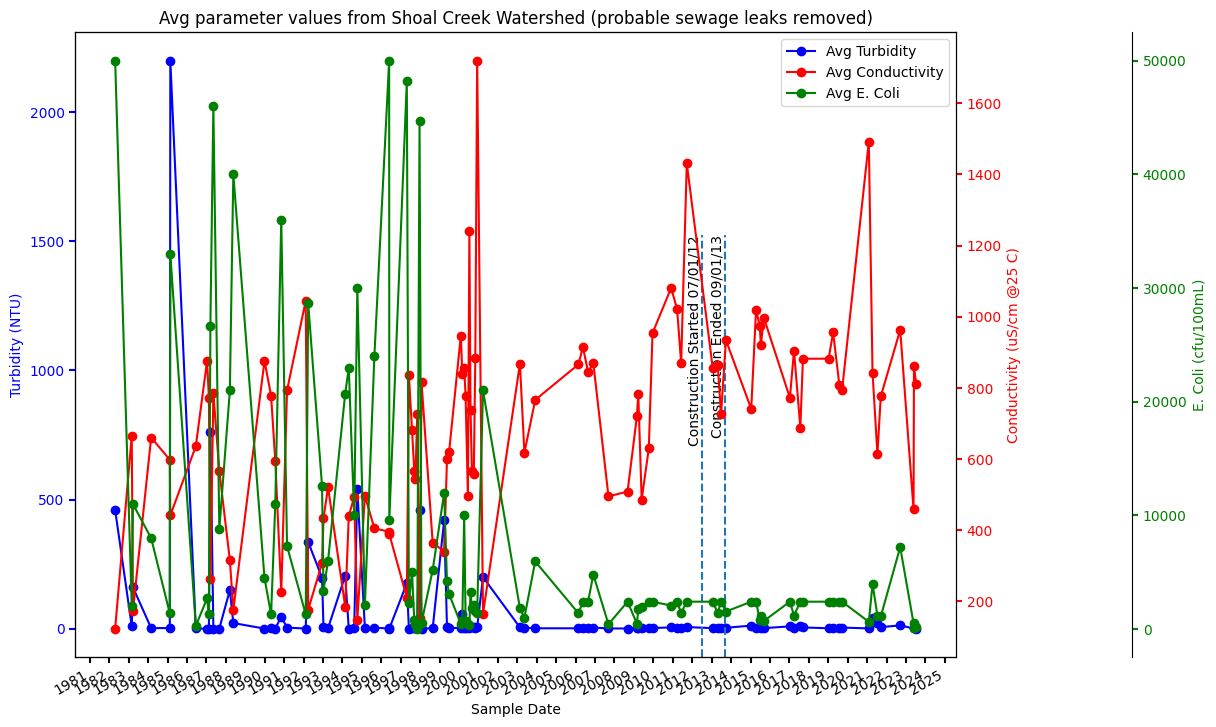

In [74]:
plot_parameter(watershed_parameters, 'avg', f'Avg parameter values from Shoal Creek Watershed (probable sewage leaks removed)')

In [75]:
pre_post_construction = intervals.query_parameters_before_after_construction(parameters)
pre_post_construction.head(10)

,location,min_date,parameter,avg_value,stddev,max_value,median_value,geometry
0,watershed,2013-09-26,conductivity,733.874839,216.668132,1492.0,805.000,POINT (620414.845 3359589.276)
1,watershed,2000-02-04,conductivity,601.852696,268.179147,1720.0,578.500,POINT (620414.845 3359589.276)
2,watershed,2013-09-26,ecoli,813.593472,1182.857476,12000.0,266.000,POINT (620126.065 3349991.584)
3,watershed,2000-02-04,ecoli,5385.800327,38991.923122,510000.0,690.000,POINT (620414.845 3359589.276)
4,watershed,2013-09-26,turbidity,3.822108,5.958250,42.0,2.085,POINT (620414.845 3359589.276)
5,watershed,2000-02-04,turbidity,30.401681,164.860066,1600.0,2.300,POINT (620297.766 3356312.879)
